# Data Exploration for Sentiment Analysis

This notebook contains exploratory analysis for the restaurant reviews dataset used in our sentiment analysis model. As per the cookiecutter data science principles, this exploratory code is kept separate from the production code in the `sentiment_model_training` package.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import sys
import os

# Add project root to path to import the sentiment_model_training package
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root: {project_root}")

Project root: c:\Users\marin\OneDrive\Documentos\Tu Delft\DSAIT\Year 1\Q4\REMLA\model-training


## Loading the Data

First, let's load the raw restaurant reviews data. We'll use the data loading functionality from our package to stay consistent.

In [2]:
# Load the raw data directly from the data directory
data_path = os.path.join(project_root, 'data', 'raw.tsv')

try:
    # Try to load data with pandas
    if os.path.exists(data_path):
        data = pd.read_csv(data_path, delimiter='\t', quoting=3)
        print(f"Data loaded successfully with shape: {data.shape}")
    else:
        print(f"Data file not found at {data_path}")
        print("Let's download it using our get_data module")
        
        # Import and use get_data module to download the data
        from sentiment_model_training.modeling.get_data import download_data
        download_data()
        
        # Now try loading again
        if os.path.exists(data_path):
            data = pd.read_csv(data_path, delimiter='\t', quoting=3)
            print(f"Data loaded successfully after download with shape: {data.shape}")
        else:
            print("Failed to download data")
            data = None
except Exception as e:
    print(f"Error loading data: {str(e)}")
    data = None
    
# Display the first few rows
if data is not None:
    data.head()

Data loaded successfully with shape: (900, 2)


## Basic Analysis

Let's explore the distribution of positive and negative reviews in our dataset.

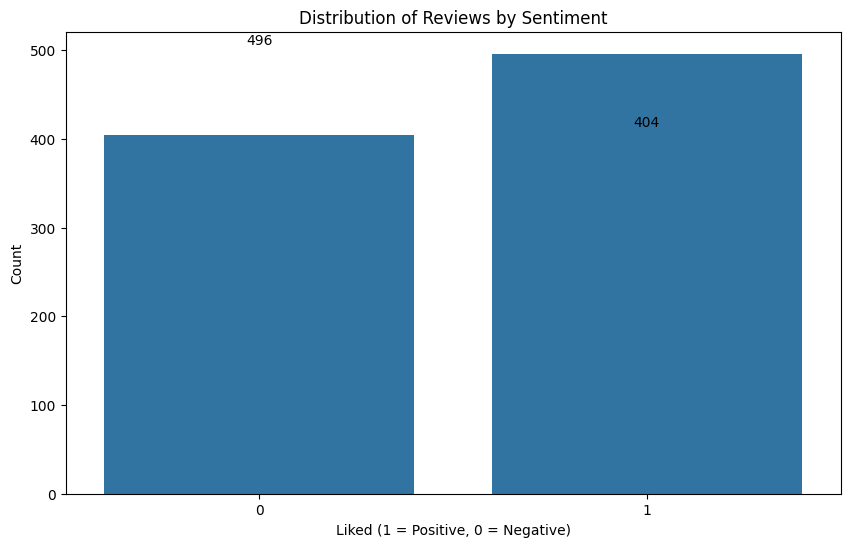

Positive reviews: 496 (55.1%)
Negative reviews: 404 (44.9%)


In [3]:
if data is not None and 'Review' in data.columns and 'Liked' in data.columns:
    # Count the number of positive and negative reviews
    sentiment_counts = data['Liked'].value_counts()
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title('Distribution of Reviews by Sentiment')
    plt.xlabel('Liked (1 = Positive, 0 = Negative)')
    plt.ylabel('Count')
    
    # Add count labels on top of bars
    for i, count in enumerate(sentiment_counts.values):
        ax.text(i, count + 10, str(count), ha='center')
    
    plt.show()
    
    print(f"Positive reviews: {sentiment_counts.get(1, 0)} ({sentiment_counts.get(1, 0)/len(data)*100:.1f}%)")
    print(f"Negative reviews: {sentiment_counts.get(0, 0)} ({sentiment_counts.get(0, 0)/len(data)*100:.1f}%)")
else:
    print("Cannot analyze sentiment distribution. Data not properly loaded or missing required columns.")

## Text Analysis

Now let's analyze the text content of the reviews to understand key characteristics like word frequency and review length.

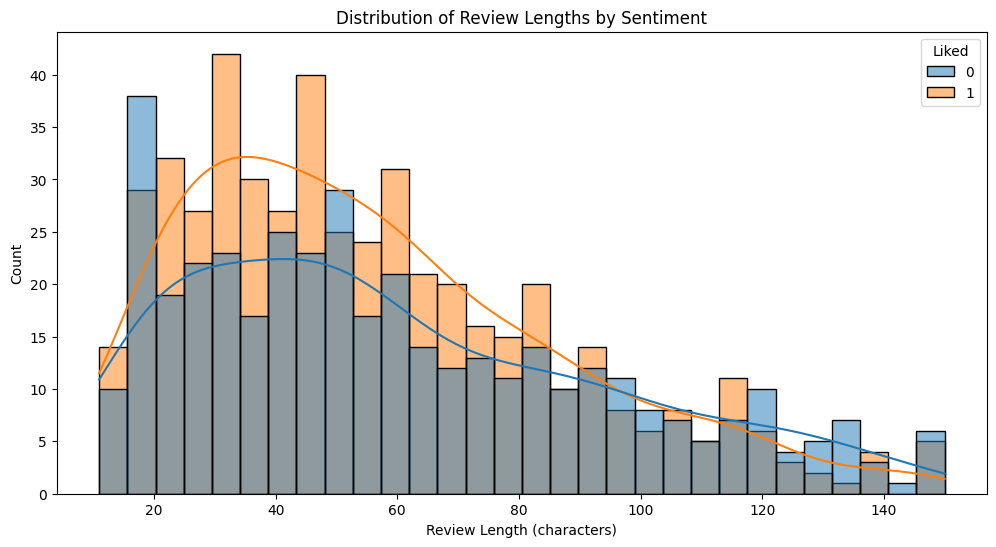

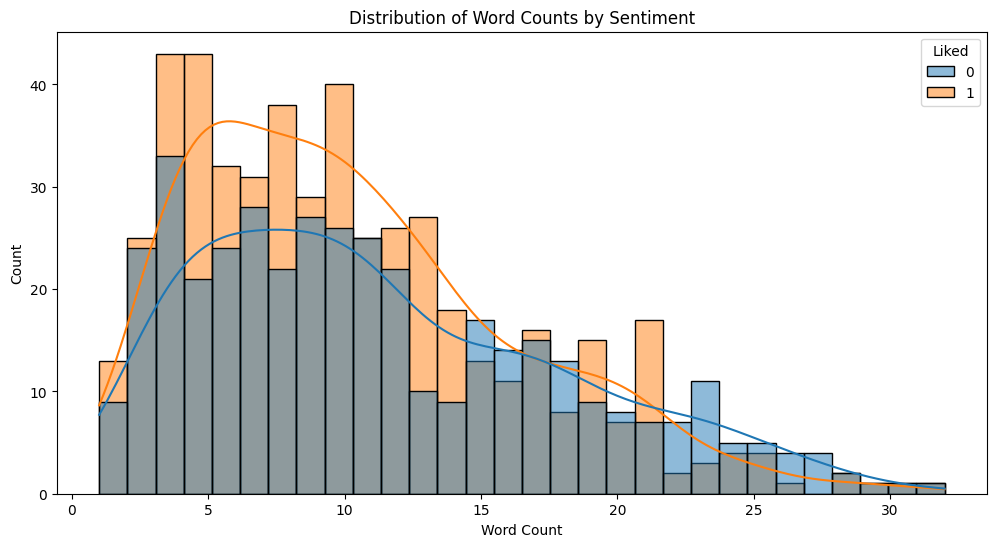

Average review length (characters): 57.7
Average word count: 10.8


In [4]:
if data is not None and 'Review' in data.columns:
    # Download NLTK resources if needed
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    
    # Calculate review length
    data['review_length'] = data['Review'].apply(len)
    
    # Plot distribution of review lengths
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='review_length', hue='Liked', bins=30, kde=True)
    plt.title('Distribution of Review Lengths by Sentiment')
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate word counts
    data['word_count'] = data['Review'].apply(lambda x: len(x.split()))
    
    # Plot distribution of word counts
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='word_count', hue='Liked', bins=30, kde=True)
    plt.title('Distribution of Word Counts by Sentiment')
    plt.xlabel('Word Count')
    plt.ylabel('Count')
    plt.show()
    
    print(f"Average review length (characters): {data['review_length'].mean():.1f}")
    print(f"Average word count: {data['word_count'].mean():.1f}")
else:
    print("Cannot analyze text content. Data not properly loaded or missing required columns.")

## Word Frequency Analysis

Let's identify the most common words in positive and negative reviews.

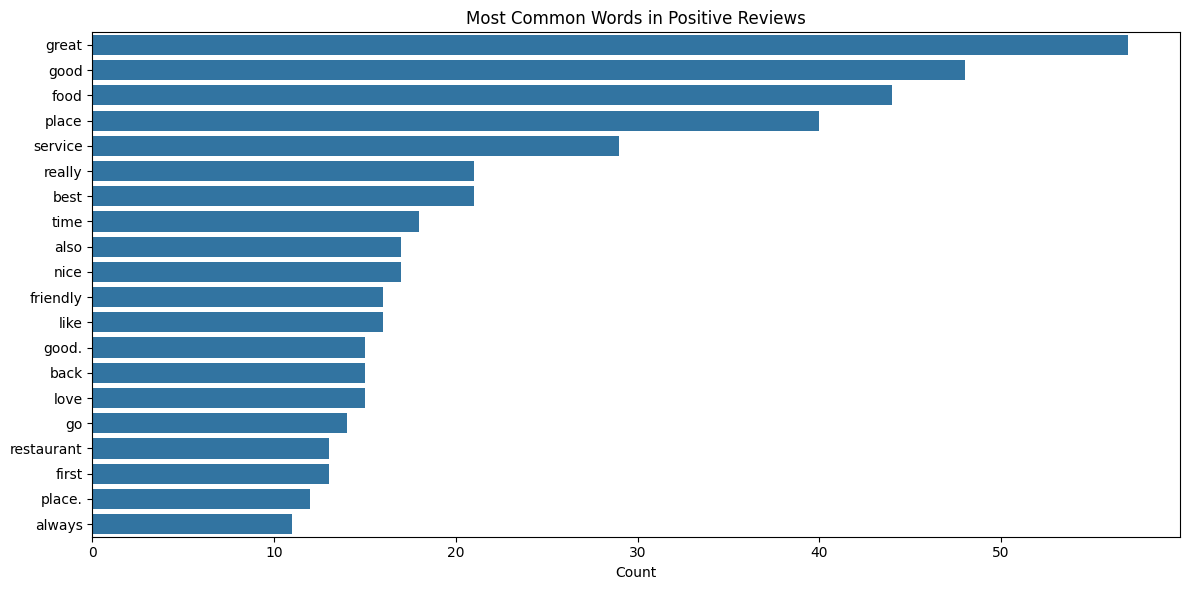

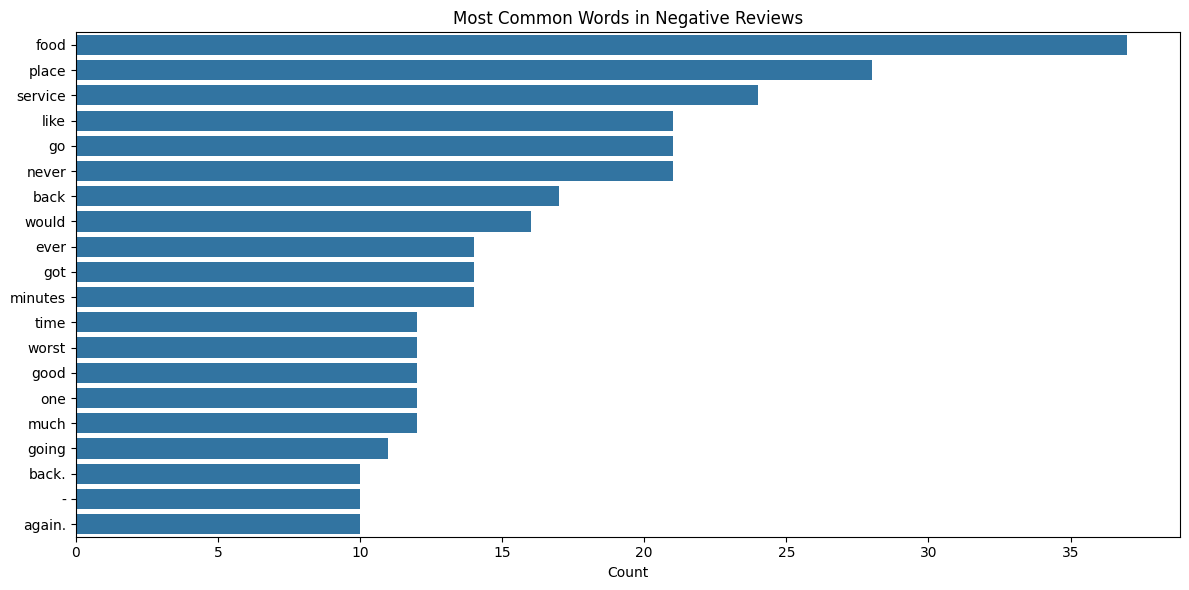

In [5]:
if data is not None and 'Review' in data.columns and 'Liked' in data.columns:
    # Function to get most common words
    def get_top_words(reviews, n=20):
        # Combine all reviews into one text
        all_text = ' '.join(reviews).lower()
        
        # Tokenize
        words = all_text.split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        # Count word frequencies
        word_counts = Counter(words)
        
        # Return top N words
        return word_counts.most_common(n)
    
    # Get positive and negative reviews
    positive_reviews = data[data['Liked'] == 1]['Review']
    negative_reviews = data[data['Liked'] == 0]['Review']
    
    # Get top words for each sentiment
    top_positive = get_top_words(positive_reviews)
    top_negative = get_top_words(negative_reviews)
    
    # Plot top words for positive reviews
    plt.figure(figsize=(12, 6))
    words, counts = zip(*top_positive)
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Most Common Words in Positive Reviews')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Plot top words for negative reviews
    plt.figure(figsize=(12, 6))
    words, counts = zip(*top_negative)
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Most Common Words in Negative Reviews')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot perform word frequency analysis. Data not properly loaded or missing required columns.")

## Exploratory Conclusions

Based on the exploratory analysis above, we can draw several insights about the data:

1. The distribution of positive and negative reviews
2. Typical review length and word count patterns
3. Common words in positive vs. negative reviews

These insights help inform our feature engineering and model selection process in the production code.

This type of exploratory analysis is kept separate from the production code, following the cookiecutter data science principles, to maintain a clean separation between exploration and production.